In [1]:
%matplotlib inline 
import pandas as pd
import re, nltk, spacy, gensim
from pprint import pprint

C:\Users\2918261\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\Users\2918261\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


In [2]:
import os
os.chdir('C://Users//2918261//Courses//Oslo Summer School//notebooks//Interviews//Text')
os.getcwd()

'C:\\Users\\2918261\\Courses\\Oslo Summer School\\notebooks\\Interviews\\Text'

In [3]:
pd.set_option('display.max_colwidth', 120)

In [4]:
table = pd.read_json('C://Users//2918261//Dropbox//Corner Office Interviews//ComparisonCorpusText//Json Tables for ML//interviews_full.json')

In [5]:
data = table.text.values.tolist()

In [6]:
data = [re.sub("\'", "", sent) for sent in data]

In [7]:
pprint(data[:1])

['Very well. Thanks for having me.\n'
 'Yeah. So a little bit about adroll. First of all we were founded in 2007 uh '
 'with a mission to bring advertising to brands of all sizes back when we '
 'started. Uh the advertising world was very different. Um the advertisements '
 'you saw online work so different than the ones you saw offline you know a '
 'typical campaign would be nike running a sponsorship on the front page and '
 'there was not much space for all the emerging brands out there. Uh and so we '
 'set out to change that. And fast forward to today were now the most widely '
 'adopted um marketing tech platform out there for brands of all sizes. And we '
 'have two business units one focused on consumer called adroll and then a '
 'sister brand called inaudible which is focused on B to b advertisers. Uh we '
 'started the company in 2007. Um my background before adderall was almost all '
 'engineering.\n'
 'Um so I come from a very uh I love to build things. And when I began a

 'dollar on trading and investing in somebody and uh rather than on some sort '
 'of perk um that is kind of more temporary. Uh so we we we tried to put our '
 'money there and at ad roll we teach thousands of classes per year. We have '
 'employees teach classes maybe on like how to use tablo or you know how to '
 'use something in our dough how to understand. Saying in our domain we bring '
 'in a lot of external teachers too. I am on almost like virtual mba type '
 'stuff. Uh we also have you know the whole the whole whole body type of stuff '
 'where we have a we have had teachers come in and teach zoomba classes or '
 'other sorts of health related. I am pretty frequently so there is over 3000 '
 'classes taught a year here for a 500 person company.\n'
 'Yeah. I think that there is three pillars around culture there is community '
 'which is how do people interact how do they get along how inclusive is your '
 'environment how comfortable people asking questions uh you know the pe

 'looking back on things and making sure that you are actually taking the time '
 'to learn from your failures. And I think by people understanding the value '
 'in that process then they are more likely to understand its okay to make '
 'mistakes.\n'
 'Um that is a good question actually. Uh one thing that you would have asked '
 'me about culture would be um well one thing I think its kind of there are '
 'two things I can relate to that I am. The first one is how do you measure '
 'culture which I think is really important. Um its sorta like how can it goes '
 'back to this idea I have where there is this. I think a myth out there were '
 'as a company gets bigger the culture gets worse it gets more bureaucratic '
 'against more stuffy things get slower there are diseconomies of scale. And I '
 'am hell-bent on destroying that myth. So actually as a company gets bigger '
 'how do you make sure that the company improves and I think I think '
 'measurements will be part of that. So we

## tokenizing and cleaning up with gensim 

In [8]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['very', 'well', 'thanks', 'for', 'having', 'me', 'yeah', 'so', 'little', 'bit', 'about', 'adroll', 'first', 'of', 'all', 'we', 'were', 'founded', 'in', 'uh', 'with', 'mission', 'to', 'bring', 'advertising', 'to', 'brands', 'of', 'all', 'sizes', 'back', 'when', 'we', 'started', 'uh', 'the', 'advertising', 'world', 'was', 'very', 'different', 'um', 'the', 'advertisements', 'you', 'saw', 'online', 'work', 'so', 'different', 'than', 'the', 'ones', 'you', 'saw', 'offline', 'you', 'know', 'typical', 'campaign', 'would', 'be', 'nike', 'running', 'sponsorship', 'on', 'the', 'front', 'page', 'and', 'there', 'was', 'not', 'much', 'space', 'for', 'all', 'the', 'emerging', 'brands', 'out', 'there', 'uh', 'and', 'so', 'we', 'set', 'out', 'to', 'change', 'that', 'and', 'fast', 'forward', 'to', 'today', 'were', 'now', 'the', 'most', 'widely', 'adopted', 'um', 'marketing', 'tech', 'platform', 'out', 'there', 'for', 'brands', 'of', 'all', 'sizes', 'and', 'we', 'have', 'two', 'business', 'units', 'one

## lemmatizing 

In [9]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

C:\Users\2918261\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\Users\2918261\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


['very well thank have so little bit adroll first be found mission bring advertising brand size back when start advertising world be very different advertisement see online work so different one see offline know typical campaign would be nike run sponsorship front page there be not much space all emerge brand out there so set change fast forward today be now most widely adopt market tech platform out there brand size have business unit focus consumer call adroll then sister brand call inaudible which be focus advertiser start company  background adderall be almost engineer so come very love build thing when begin ceo here can admit be pretty far  comfort zone have think way adapt  background know build code write program software how do build great organization where people thrive very quickly come believe people be everything get people can just get everything else wrong still be okay so start there have have employee company be number global office united state where san francisco ut

In [10]:
table['data_lemmatized'] = data_lemmatized

In [11]:
table.head()

,filename,text,Name,Gender,Organization,Current Age,NativeSpeaker,Traded,MBA,Sector_Grouped,Female,Sector_Grouped_Dic,Femininity,Masculinity,data_lemmatized
0,AaronBellCombined.txt,Very well. Thanks for having me.\nYeah. So a little bit about adroll. First of all we were founded in 2007 uh with a...,AaronBell,M,AdRoll,42,1,0,0,2,0,Communications,64.47,38.83,very well thank have so little bit adroll first be found mission bring advertising brand size back when start advert...
1,AaronLevieCombined.txt,Oh boy.Wow. Did we kick off this show\nThank you. I am glad that you re-professed your love for B2B. \nYeah its bee...,AaronLevie,M,Box Inc,33,1,1,0,3,0,Technology,63.35,37.73,do kick show thank be glad re profess love be good few year obviously lot craziness space probably just have go p...
10,AlastairMitchellCombined.txt,The most important thing you can do as a business leader is find the right team to help you run your company cofoun...,AlastairMitchell,M,Huddle,43,0,0,0,3,0,Technology,66.10,38.01,most important thing can do business leader be find right team help run company cofounder manager director business...
100,ChristopherCabreraCombined.txt,welcome thanks for having me Gerhard always great to talk with you \nwell there is a lot of exciting stuff happening...,ChristopherCabrera,M,Xactly,52,1,0,1,3,0,Technology,65.74,36.78,welcome thank have gerhard always great talk there be lot exciting stuff happen dream force know be launch company...
101,ChristopherJNassettaCombined.txt,We are indeed.\n Well I think first of all its not a milestone that many companies get to celebrate. The list of co...,ChristopherJNassetta,M,Hilton Worldwide Holdings Inc,55,1,1,0,1,0,Consumer Discretionary,58.88,39.61,be indeed well think first all not milestone many company get celebrate list company that make year old be pretty s...


In [12]:
import re

def generate_ngrams(s, n):
    # Convert to lowercases
    s = s.lower()
    
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
    tokens = s.split(" ") 
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [13]:
import re

def generate_ngrams(s, n):
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [14]:
speech = ' '.join(data_lemmatized)

In [15]:
two_grams = generate_ngrams(speech, 2)

In [16]:
two_grams.sort()

In [17]:
from collections import Counter

In [18]:
x = Counter(two_grams)

In [19]:
x. most_common(50)

[('do not', 8739),
 ('there be', 5556),
 ('be not', 5289),
 ('that be', 4971),
 ('be go', 4442),
 ('what be', 3666),
 ('have be', 2857),
 ('who be', 2165),
 ('be be', 2081),
 ('be do', 2036),
 ('be really', 1941),
 ('be very', 1929),
 ('think be', 1774),
 ('when be', 1627),
 ('what do', 1598),
 ('people who', 1573),
 ('can not', 1540),
 ('not have', 1519),
 ('thing that', 1360),
 ('be just', 1356),
 ('have get', 1353),
 ('be good', 1309),
 ('go be', 1306),
 ('that have', 1289),
 ('do be', 1282),
 ('which be', 1253),
 ('be what', 1246),
 ('people be', 1245),
 ('be able', 1161),
 ('say be', 1157),
 ('not be', 1106),
 ('not know', 1084),
 ('thing be', 1073),
 ('how do', 1060),
 ('be so', 1048),
 ('know be', 975),
 ('have do', 953),
 ('so be', 943),
 ('kind of', 908),
 ('would be', 903),
 ('want be', 880),
 ('have have', 866),
 ('know what', 865),
 ('not go', 863),
 ('make sure', 793),
 ('be have', 755),
 ('can be', 754),
 ('company be', 748),
 ('be more', 738),
 ('will be', 728)]

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
vectorizer = CountVectorizer(analyzer='word',
                             ngram_range = (1, 3),
                             min_df = 10,
                             #max_df = 0.9, # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

In [22]:
data_vectorized = vectorizer.fit(data_lemmatized)

In [23]:
len(data_vectorized.get_feature_names())

8896

In [24]:
review_word_counts = vectorizer.transform(data_lemmatized)

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
nb_classifier = MultinomialNB()

In [27]:
nb_classifier.fit(review_word_counts, table['Female'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
nb_classifier.coef_

array([[-10.77946658,  -7.21463977, -11.47261376, ...,  -9.62678707,
         -8.74258465, -11.87807887]])

In [29]:
coeficients = pd.Series(nb_classifier.coef_[0], 
                        index=vectorizer.get_feature_names())

In [30]:
coeficients.sort_values()[:20]

stuff want              -12.571226
intellectual property   -12.571226
mac                     -12.571226
ford                    -12.571226
recur                   -12.571226
build software          -12.571226
innovation happen       -12.571226
lawn                    -12.571226
thing tough             -12.571226
share company           -12.571226
samsung                 -12.571226
care care               -12.571226
illegal                 -12.571226
horsepower              -12.571226
human nature            -12.571226
funny thing             -12.571226
hack                    -12.571226
unify                   -12.571226
day new                 -12.571226
solution just           -12.571226
dtype: float64

In [31]:
coeficients.sort_values(ascending=False)[:20]

people     -4.126174
think      -4.268217
know       -4.311768
really     -4.512582
say        -4.540491
work       -4.571212
want       -4.684769
just       -4.693829
thing      -4.715294
make       -4.752394
time       -4.900798
good       -4.948073
company    -5.065184
lot        -5.185375
need       -5.227800
come       -5.252024
year       -5.258673
way        -5.286405
business   -5.341387
look       -5.379044
dtype: float64

In [32]:
import mglearn

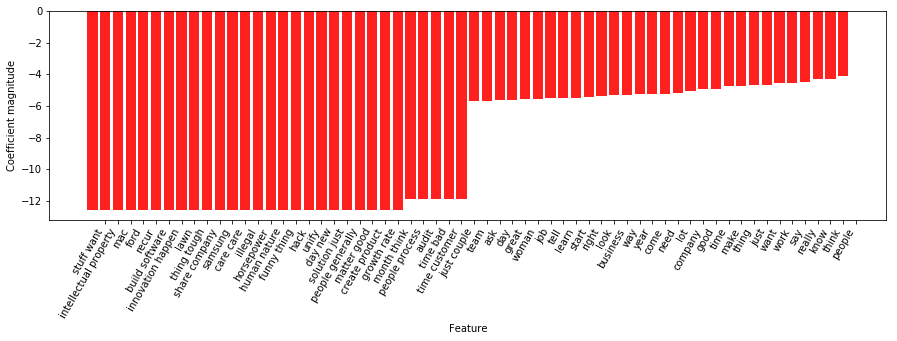

In [33]:
mglearn.tools.visualize_coefficients(nb_classifier.coef_[0], vectorizer.get_feature_names(), n_top_features=30)

In [34]:
nb_classifier.predict(review_word_counts)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,

In [35]:
table['prediction']  = nb_classifier.predict(review_word_counts)

In [36]:
pd.crosstab(table['Female'], table['prediction'])

prediction,0,1
Female,,
0,291,27
1,10,194


In [37]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(table, test_size=0.2)

In [38]:
len(train)

417

In [39]:
len(test)

105

In [40]:
vectorizer.fit(train['data_lemmatized'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='[a-zA-Z0-9]{3,}',
        tokenizer=None, vocabulary=None)

In [41]:
X_train = vectorizer.transform(train['data_lemmatized'])

In [42]:
nb_classifier.fit(X_train, train['Female'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [44]:
print(accuracy_score(train['Female'],
                     nb_classifier.predict(X_train)))

0.9256594724220624


In [45]:
print(confusion_matrix(train['Female'], 
                      nb_classifier.predict(X_train)))

[[238  24]
 [  7 148]]


In [46]:
print(classification_report(train['Female'],
                       nb_classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       262
           1       0.86      0.95      0.91       155

   micro avg       0.93      0.93      0.93       417
   macro avg       0.92      0.93      0.92       417
weighted avg       0.93      0.93      0.93       417



In [47]:
test_wf         = vectorizer.transform(test['data_lemmatized'])
test_prediction = nb_classifier.predict(test_wf)

In [48]:
print(accuracy_score(test['Female'], test_prediction))

0.7523809523809524


In [49]:
print(classification_report(test['Female'], test_prediction))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        56
           1       0.77      0.67      0.72        49

   micro avg       0.75      0.75      0.75       105
   macro avg       0.75      0.75      0.75       105
weighted avg       0.75      0.75      0.75       105



In [50]:
X = table.data_lemmatized
y = table.Female

In [51]:
print(X.shape)
print(y.shape)

(522,)
(522,)


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(391,)
(131,)
(391,)
(131,)


In [53]:
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='[a-zA-Z0-9]{3,}',
        tokenizer=None, vocabulary=None)

In [54]:
X_train_dtm = vectorizer.transform(X_train)

In [55]:
X_train_dtm = vectorizer.fit_transform(X_train)

In [56]:
X_test_dtm = vectorizer.transform(X_test)

In [57]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [58]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [59]:
y_pred_class = nb.predict(X_test_dtm)

In [60]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.7786259541984732

In [61]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[64, 15],
       [14, 38]], dtype=int64)

In [62]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]

In [63]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.8392161635832522

In [64]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()

In [65]:
logreg.fit(X_train_dtm, y_train)

C:\Users\2918261\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
y_pred_class = logreg.predict(X_test_dtm)

In [67]:
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1] 

In [68]:
metrics.accuracy_score(y_test, y_pred_class)

0.8015267175572519

In [69]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.875365141187926

In [70]:
X_train_tokens = vectorizer.get_feature_names()
len(X_train_tokens)

6599

In [71]:
female_token_count = nb.feature_count_[1, :]

In [72]:
male_token_count = nb.feature_count_[0, :]

In [73]:
tokens = pd.DataFrame({'token': X_train_tokens, 'female': female_token_count, 'male': male_token_count})

In [74]:
tokens.head()

,token,female,male
0,ability,158.0,258.0
1,ability listen,1.0,11.0
2,able,358.0,518.0
3,able build,4.0,6.0
4,able come,6.0,6.0


In [75]:
# convert the female and male counts into frequencies 
tokens['female'] = tokens.female / nb.class_count_[1]
tokens['male']   = tokens.male / nb.class_count_[0]
tokens.sample(5)

,token,female,male
5220,spot,0.190789,0.351464
307,aware,0.328947,0.263598
3165,look company,0.019737,0.071130
1134,crash,0.072368,0.092050
5937,transaction,0.118421,0.209205


In [76]:
# calculate the ratio of female to male for each token 
tokens['female_ratio'] = tokens.female/tokens.male
tokens.sample(5)

,token,female,male,female_ratio
4891,say think,0.348684,0.389121,0.896081
6065,united,0.250000,0.502092,0.497917
1419,dirty,0.039474,0.041841,0.943421
5626,thing job,0.019737,0.041841,0.471711
5124,small company,0.078947,0.150628,0.524123


In [77]:
tokens.sort_values('female_ratio', ascending = False)

,token,female,male,female_ratio
5786,think woman,0.203947,0.000000,inf
6483,work woman,0.072368,0.000000,inf
1551,eighth,0.092105,0.000000,inf
6595,young woman,0.243421,0.004184,58.177632
6396,woman work,0.125000,0.004184,29.875000
3246,lot woman,0.105263,0.004184,25.157895
4116,pet,0.092105,0.004184,22.013158
6389,woman know,0.092105,0.004184,22.013158
6393,woman start,0.078947,0.004184,18.868421
6391,woman need,0.059211,0.004184,14.151316


In [78]:
vectorizer.get_feature_names()

['ability',
 'ability listen',
 'able',
 'able build',
 'able come',
 'able look',
 'able make',
 'able people',
 'able really',
 'able say',
 'able sell',
 'able use',
 'able work',
 'abroad',
 'absolute',
 'absolutely',
 'absorb',
 'abuse',
 'academic',
 'accelerate',
 'accept',
 'acceptable',
 'access',
 'access information',
 'accessible',
 'accident',
 'accomplish',
 'accomplishment',
 'accord',
 'account',
 'accountability',
 'accountable',
 'accountant',
 'accounting',
 'accurate',
 'achieve',
 'achieve goal',
 'achievement',
 'acknowledge',
 'acquire',
 'acquisition',
 'act',
 'action',
 'active',
 'actively',
 'activist',
 'activity',
 'actor',
 'actual',
 'actually',
 'actually good',
 'actually great',
 'actually happen',
 'actually just',
 'actually know',
 'actually like',
 'actually look',
 'actually lot',
 'actually make',
 'actually people',
 'actually pretty',
 'actually really',
 'actually say',
 'actually spend',
 'actually start',
 'actually talk',
 'actually think'

In [79]:
word_freq_df = pd.DataFrame(frequency_array.toarray(),
                            columns = vectorizer.get_feature_names())

NameError: name 'frequency_array' is not defined

In [ ]:
word_freq_df.info()

In [ ]:
word_freq_df.head()

In [ ]:
word_freq_df.sum().sort_values(ascending=False)[:20]

In [ ]:
# extracting two grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(lowercase = True,
                             # token_pattern = r"(?u)\b\w+\b",
                             token_pattern = r"[a-zA-Z]\w+",
                             # tokenizer=textblob_tokenizer, 
                             ngram_range = (2,2),
                             stop_words = ['000'],
                             max_df    = .9,
                             min_df    = .2)

In [ ]:
vectorizer.fit(table['Interview'])

In [ ]:
len(vectorizer.get_feature_names())

In [ ]:
frequency_array = vectorizer.transform(table['Interview'])

In [ ]:
word_freq_df_twograms = pd.DataFrame(frequency_array.toarray(), 
                            columns = vectorizer.get_feature_names())

In [ ]:
# extracting three grams 

In [ ]:
vectorizerT = CountVectorizer(lowercase = True,
                             # token_pattern = r"(?u)\b\w+\b",
                             token_pattern = r"[a-zA-Z]\w+",
                             # tokenizer=textblob_tokenizer, 
                             ngram_range = (3,3),
                             stop_words = ['000'],
                             max_df    = .9,
                             min_df    = .2)

In [ ]:
vectorizerT.fit(table['Interview'])

In [ ]:
len(vectorizerT.get_feature_names())

In [ ]:
frequency_arrayT = vectorizerT.transform(table['Interview'])

In [ ]:
word_freq_df_threegrams = pd.DataFrame(frequency_arrayT.toarray(), 
                            columns = vectorizerT.get_feature_names())

In [ ]:
from textblob import TextBlob

# Use TextBlob
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

In [ ]:
# extracting words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(lowercase = True,
                             # token_pattern = r"(?u)\b\w+\b",
                             token_pattern = '[a-zA-Z]\w+',
                             ngram_range = (1,1),
                             stop_words = ['000'],
                             tokenizer=textblob_tokenizer,      
                             max_df    = .9,
                             min_df    = .2)

In [ ]:
tfidf_vectorizer.fit(table['Interview'])

In [ ]:
tfidf_array = tfidf_vectorizer.transform(table['Interview'])

In [ ]:
tfidf_df = pd.DataFrame(tfidf_array.todense(),
             columns = tfidf_vectorizer.get_feature_names())

In [ ]:
len(tfidf_df.columns)

In [ ]:
core = pd.read_excel('C://Users//2918261//Dropbox//Corner Office Interviews//core.xlsx')

In [ ]:
df_combined = pd.concat([core, word_freq_df_twograms, word_freq_df_threegrams, tfidf_df], axis=1)

In [ ]:
df_combined.to_excel('FeatureTable.xlsx', index = False)

In [ ]:
df_combined.info()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer_tri = TfidfVectorizer(lowercase = True,
                             token_pattern = r"(?u)\b\w+\b",
                             ngram_range = (3,3),
                             stop_words = ['000'],
                             max_df    = .9,
                             min_df    = .3)

In [ ]:
tfidf_vectorizer_tri.fit(table['Interview'])

In [ ]:
tfidf_array = tfidf_vectorizer_tri.transform(table['Interview'])

In [ ]:
tfidf_df = pd.DataFrame(tfidf_array.todense(),
             columns = tfidf_vectorizer_tri.get_feature_names())

In [ ]:
df_combined = pd.concat([table, tfidf_df], axis=1)

In [ ]:
df_combined.info()